# Assignment - week6

import the necessary libraries, including Pandas for data manipulation and Scikit-learn for similarity calculations.

In [16]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import euclidean_distances

Load the ratings and movies datasets into pandas DataFrames.                                   
Explore the structure and type of data in both datasets.                           
and filter it to get only the movies watched by user 2.                       
We count the number of movies watched.

In [17]:
import pandas as pd

ratings_df = pd.read_csv("ratings.csv")
movies_df = pd.read_csv("movies.csv")


movies_df.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [18]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [19]:
user_2_ratings = ratings_df[ratings_df['userId'] == 2]
print("\nRatings by User 2:")
print(user_2_ratings)



Ratings by User 2:
     userId  movieId  rating   timestamp
232       2      318     3.0  1445714835
233       2      333     4.0  1445715029
234       2     1704     4.5  1445715228
235       2     3578     4.0  1445714885
236       2     6874     4.0  1445714952
237       2     8798     3.5  1445714960
238       2    46970     4.0  1445715013
239       2    48516     4.0  1445715064
240       2    58559     4.5  1445715141
241       2    60756     5.0  1445714980
242       2    68157     4.5  1445715154
243       2    71535     3.0  1445714974
244       2    74458     4.0  1445714926
245       2    77455     3.0  1445714941
246       2    79132     4.0  1445714841
247       2    80489     4.5  1445715340
248       2    80906     5.0  1445715172
249       2    86345     4.0  1445715166
250       2    89774     5.0  1445715189
251       2    91529     3.5  1445714891
252       2    91658     2.5  1445714938
253       2    99114     3.5  1445714874
254       2   106782     5.0  1445714

In [20]:
# Count movies watched by user 2
movies_watched_by_user_2 = user_2_ratings.shape[0]
print("\nNumber of movies watched by User 2:", movies_watched_by_user_2)


Number of movies watched by User 2: 29


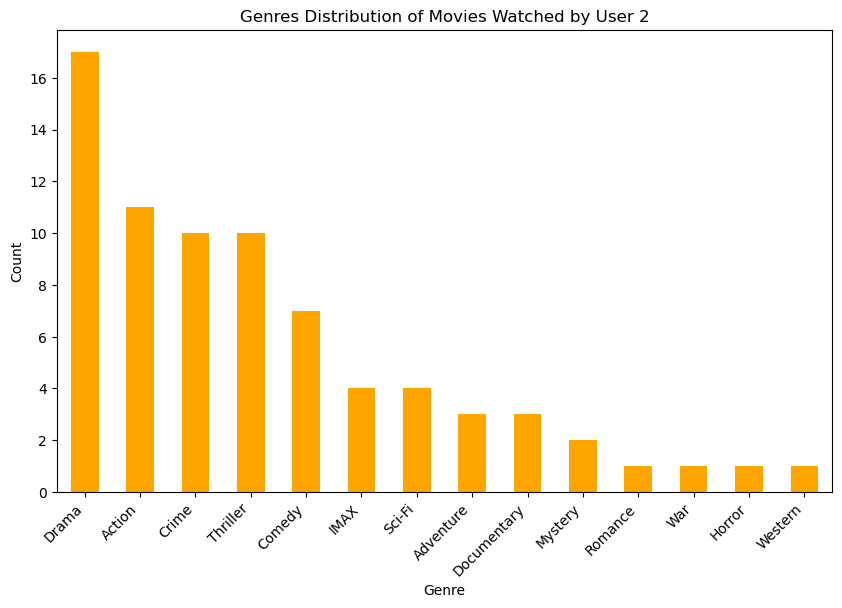

In [21]:
import matplotlib.pyplot as plt

# Step 6: Visualize the genres User 2 is interested in
# Extract User 2's watched movies genres
user_2_movie_genres = user_2_movies['genres'].str.split('|', expand=True).stack()

# Calculate genre frequencies
genre_counts = user_2_movie_genres.value_counts()

# Plot the genre distribution
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='orange')
plt.title('Genres Distribution of Movies Watched by User 2')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


We plot a bar chart of user 2's movie ratings distribution.

<Axes: title={'center': 'User 2 Movie Ratings'}, xlabel='Rating', ylabel='Count'>

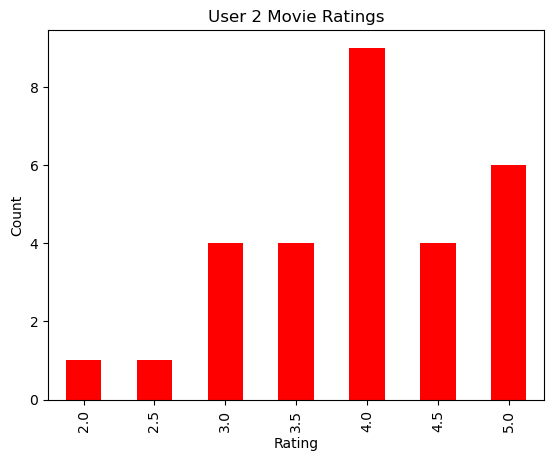

In [22]:
user_2_movies = pd.merge(user_2_ratings, movies_df, on='movieId', how='left')
rating_counts = user_2_movies['rating'].value_counts().sort_index()
rating_counts.plot(kind='bar', color='red', xlabel='Rating', ylabel='Count', title='User 2 Movie Ratings')

Identify top movies for user 2

We merge the ratings data with the movies data to get movie titles, then sort the movies based on ratings to find user 2's top-rated movies.

In [23]:
top_rated_by_user_2 = user_2_ratings[user_2_ratings['rating'] >= 4.0]
print("\nTop rated movies by User 2:")
print(top_rated_by_user_2)



Top rated movies by User 2:
     userId  movieId  rating   timestamp
233       2      333     4.0  1445715029
234       2     1704     4.5  1445715228
235       2     3578     4.0  1445714885
236       2     6874     4.0  1445714952
238       2    46970     4.0  1445715013
239       2    48516     4.0  1445715064
240       2    58559     4.5  1445715141
241       2    60756     5.0  1445714980
242       2    68157     4.5  1445715154
244       2    74458     4.0  1445714926
246       2    79132     4.0  1445714841
247       2    80489     4.5  1445715340
248       2    80906     5.0  1445715172
249       2    86345     4.0  1445715166
250       2    89774     5.0  1445715189
254       2   106782     5.0  1445714966
256       2   112552     4.0  1445714882
259       2   122882     5.0  1445715272
260       2   131724     5.0  1445714851


Similarity analysis : Compute the most similar user to User 2 using at least 2 distance metrics (e.g., cosine similarity and Euclidean distance).

In [24]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# Compute cosine similarity between user 2 and all other users
user_item_matrix = ratings_df.pivot_table(index='userId', columns='movieId', values='rating').fillna(0)
user_2_vector = user_item_matrix.loc[2].values.reshape(1, -1)
cosine_similarities = cosine_similarity(user_2_vector, user_item_matrix)[0]

# Find the most similar user based on cosine similarity
most_similar_user_cosine = np.argsort(cosine_similarities)[-2] + 1  # Adjusting for user index starting at 1
print("\nMost similar user to User 2 (Cosine Similarity):", most_similar_user_cosine)

# Compute Euclidean distances between user 2 and all other users
euclidean_dists = euclidean_distances(user_2_vector, user_item_matrix)[0]

# Find the most similar user based on Euclidean distance
most_similar_user_euclidean = np.argsort(euclidean_dists)[1] + 1  # Adjusting for user index starting at 1
print("Most similar user to User 2 (Euclidean Distance):", most_similar_user_euclidean)



Most similar user to User 2 (Cosine Similarity): 366
Most similar user to User 2 (Euclidean Distance): 442


We recommend movies for user 2 based on the ratings of the most similar user.

In [25]:
# Define function to get recommendations based on a similar user's preferences
def get_recommendations_for_user(similar_user_id, user_ratings, movies_df, n_recommendations=5):
    similar_user_ratings = user_ratings[user_ratings['userId'] == similar_user_id]
    highly_rated_by_similar_user = similar_user_ratings[similar_user_ratings['rating'] >= 4.0]
    movies_not_watched_by_user_2 = highly_rated_by_similar_user[~highly_rated_by_similar_user['movieId'].isin(user_2_ratings['movieId'])]
    recommendations_with_titles = pd.merge(movies_not_watched_by_user_2, movies_df, on='movieId', how='left')
    recommendations = recommendations_with_titles[['title', 'rating']].sample(n=min(n_recommendations, len(recommendations_with_titles)), random_state=1)
    return recommendations

# Get recommendations based on the most similar users found by each metric
recommendations_cosine = get_recommendations_for_user(most_similar_user_cosine, ratings_df, movies_df)
recommendations_euclidean = get_recommendations_for_user(most_similar_user_euclidean, ratings_df, movies_df)

print("\nRecommendations for User 2 (Cosine Similarity):")
print(recommendations_cosine)

print("\nRecommendations for User 2 (Euclidean Distance):")
print(recommendations_euclidean)



Recommendations for User 2 (Cosine Similarity):
                                                title  rating
3                               Reservoir Dogs (1992)     5.0
7   Lord of the Rings: The Fellowship of the Ring,...     4.5
6                          Requiem for a Dream (2000)     4.0
2                                     Die Hard (1988)     4.0
10                           Kill Bill: Vol. 2 (2004)     4.0

Recommendations for User 2 (Euclidean Distance):
Empty DataFrame
Columns: [title, rating]
Index: []


# Analysis/Summary

Here's a simplified summary of the process:

1. **Data Loading and Exploration**:
   - Loaded the datasets `ratings.csv` and `movies.csv` into pandas DataFrames.
   - Conducted initial exploration to understand the structure and type of data in both datasets.

2. **Movies Watched by User 2**:
   - Extracted movies watched by User 2 from the ratings dataset to analyze their interactions with various movies.

3. **Analysis of User 2's Movie Ratings**:
   - Analyzed User 2's movie ratings to determine how many movies they have watched.
   - Plotted a bar chart to visualize the distribution of User 2's movie ratings, showing the counts of unique ratings given by User 2.

4. **Identification of Top-rated Movies by User 2**:
   - Identified movies with the highest ratings from User 2 to determine some of their top-rated movies.

5. **Similarity Analysis**:
   - Calculated the similarity between User 2 and other users in the dataset using two distance metrics: Cosine Similarity and Euclidean Distance.
   - Identified the most similar user to User 2 using both metrics, allowing for a comparison of similarity from different perspectives.

6. **Movie Recommendations for User 2**:
   - Recommended movies to User 2 based on the similarity analysis.
   - Identified movies highly rated by the most similar users that User 2 has not yet watched.
   - Conducted the recommendation process separately for the most similar user identified by each similarity metric, resulting in two sets of recommendations.

Overall, the process involved loading and exploring the data, analyzing User 2's movie ratings, identifying top-rated movies, conducting similarity analysis with other users, and providing movie recommendations for User 2 based on similarity metrics.